In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sweetviz as sv
from IPython.display import display
import seaborn as sns
import plotly.graph_objects as go
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, make_scorer,confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\Forage\Customer\customer_booking.csv",encoding='latin-1',delimiter=',', header=None, skiprows=1,names=['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'])

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
df.shape

(50000, 14)

In [6]:
!pip install --upgrade pandas

In [7]:
pd.__version__

'2.0.3'

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,NaN,NaN,NaN,1.59124,1.020165,1.0,1.0,1.0,2.0,9.0
sales_channel,50000,2,Internet,44382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_type,50000,3,RoundTrip,49497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_lead,50000.0,NaN,NaN,NaN,84.94048,90.451378,0.0,21.0,51.0,115.0,867.0
length_of_stay,50000.0,NaN,NaN,NaN,23.04456,33.88767,0.0,5.0,17.0,28.0,778.0
flight_hour,50000.0,NaN,NaN,NaN,9.06634,5.41266,0.0,5.0,9.0,13.0,23.0
flight_day,50000,7,Mon,8102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,50000,799,AKLKUL,2680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_origin,50000,104,Australia,17872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wants_extra_baggage,50000.0,NaN,NaN,NaN,0.66878,0.470657,0.0,0.0,1.0,1.0,1.0


In [10]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
#DATA VISUALIZATION

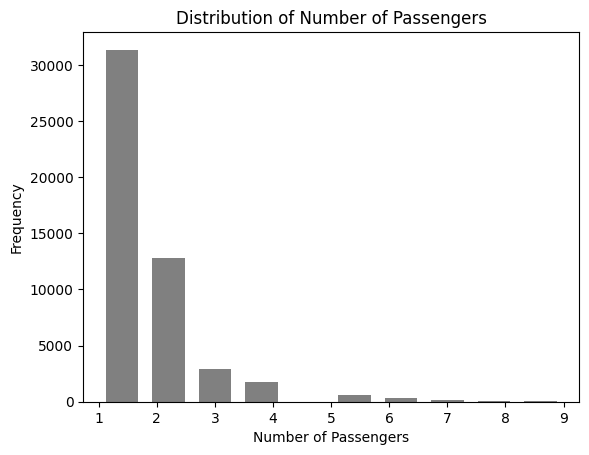

In [13]:
# cmap = plt.cm.get_cmap('coolwarm_r', 9) 
# colors = [cmap(i) for i in np.linspace(0, 1, 9)]
ax=plt.hist(df['num_passengers'],rwidth=0.7,color=['grey'])
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Passengers')
plt.show()

In [14]:
label_data=df.sales_channel.value_counts()


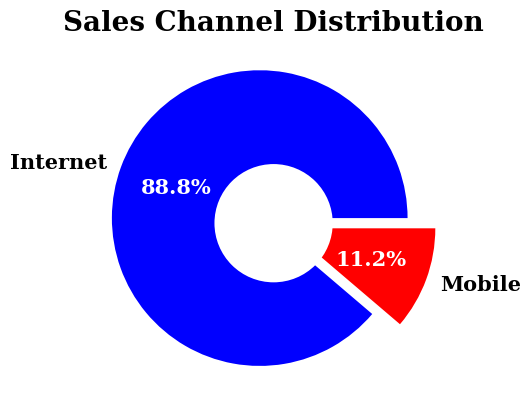

In [15]:

patches, texts, pcts =plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.60,
                              
                               explode=[0.1,0.1],
                              
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sales Channel Distribution', size=20, **hfont)
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


<Axes: xlabel='trip_type'>

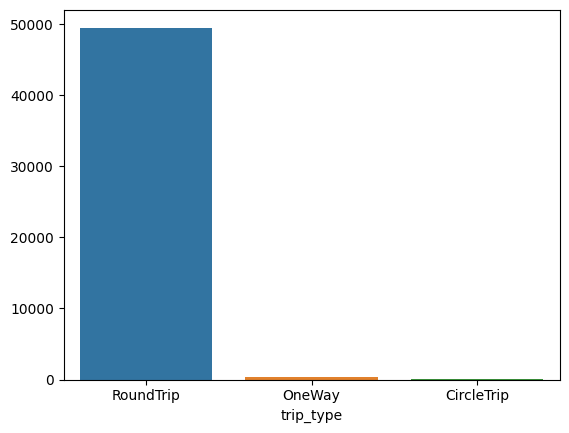

In [16]:
sns.barplot(x=df['trip_type'].value_counts().index,y=df['trip_type'].value_counts().values)
#It is found that most of the trip type is round trip so other effect can be neglected

In [17]:
#Booking_Orgin Distribution
df[['booking_origin']].sort_values(by=['booking_origin'],ascending=False).head(10)

,booking_origin
44295,Vietnam
21804,Vietnam
21266,Vietnam
33863,Vietnam
33868,Vietnam
33869,Vietnam
33879,Vietnam
33884,Vietnam
38893,Vietnam
33885,Vietnam


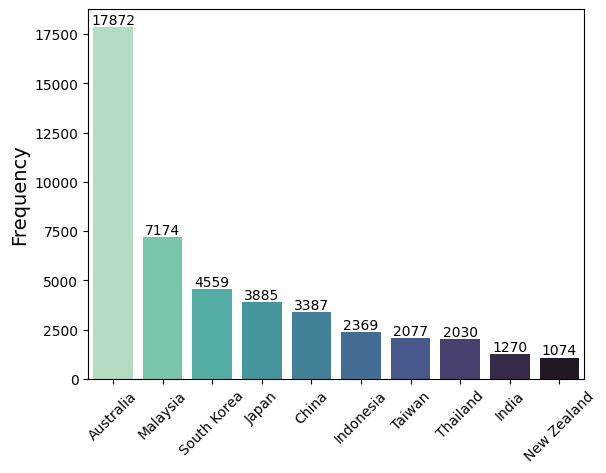

In [18]:

ax=sns.countplot(x='booking_origin',data=df,order=df.booking_origin.value_counts().nlargest(10).index,palette="mako_r")
ax.bar_label(ax.containers[0])
plt.xlabel(None)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.show()

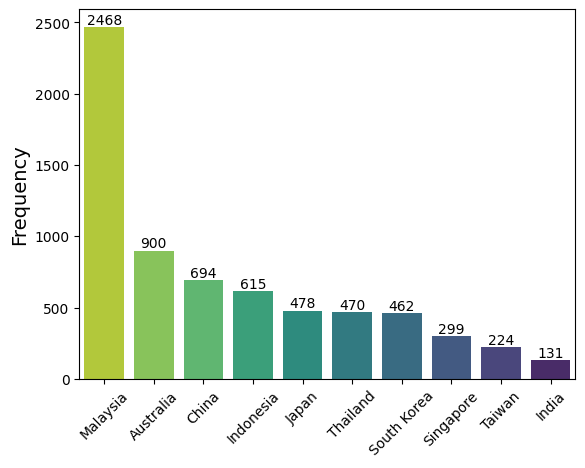

In [19]:
#Which country did more booking?
country=df[df['booking_complete']==1]['booking_origin'].value_counts().nlargest(10)
ax=sns.barplot(x=country.index,y=country.values,palette="viridis_r")
ax.bar_label(ax.containers[0])
plt.xlabel(None)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.show()

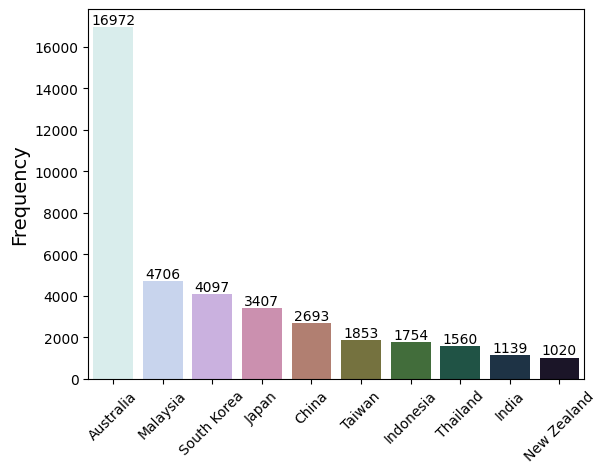

In [20]:
#Which country did cancel booking?
country=df[df['booking_complete']==0]['booking_origin'].value_counts().nlargest(10)
ax=sns.barplot(x=country.index,y=country.values,palette="cubehelix_r")
ax.bar_label(ax.containers[0])
plt.xlabel(None)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [21]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


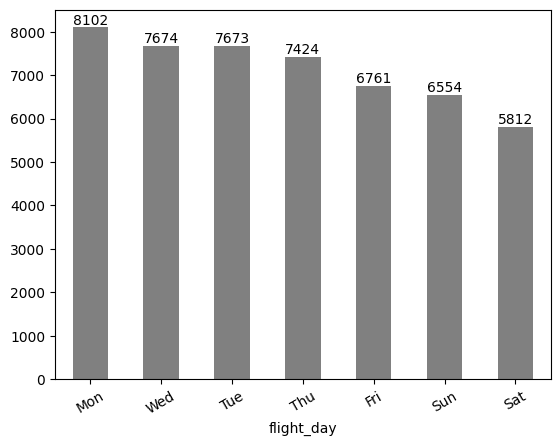

In [22]:
ax=df['flight_day'].value_counts().plot(kind='bar',color='grey',)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)
plt.show()

In [23]:
mapp={0:'No extra baggage',1:'extra_baggage'}
colors=['#9bddff','#ff6700']
label=list(df['wants_extra_baggage'].map(mapp).value_counts().index)
value=list(df['wants_extra_baggage'].map(mapp).value_counts().values)
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.3,pull=[0.05],marker_colors=colors)])
fig.update_layout(legend=dict(yanchor="bottom", y=0.9, xanchor="left", x=0.4))
fig.show()

In [24]:

mapp={0:'No meal',1:' meal'}
colors=['#9bddff','#tf6900']
label=list(df['wants_in_flight_meals'].map(mapp).value_counts().index)
value=list(df['wants_in_flight_meals'].map(mapp).value_counts().values)
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.3,pull=[0.05],marker_colors=colors)])
fig.update_layout(legend=dict(yanchor="bottom", y=0.9, xanchor="left", x=0.4))
fig.show()

In [25]:
df.select_dtypes(include='object').columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

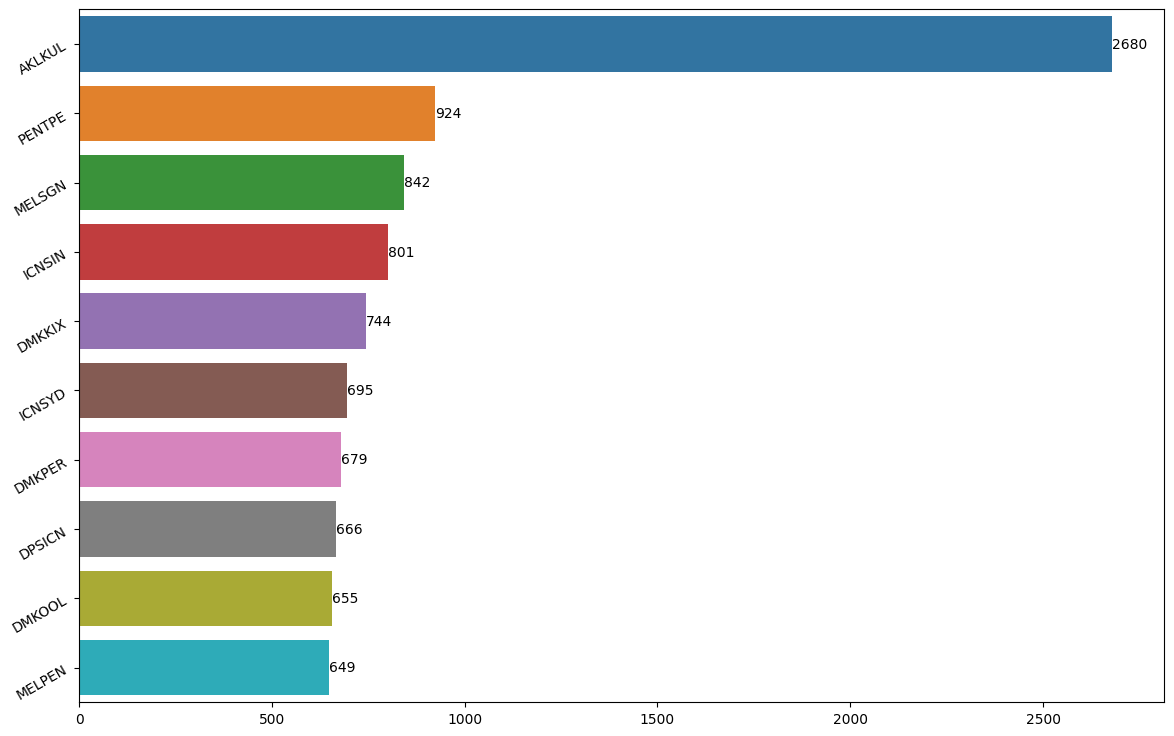

In [26]:
#Route
plt.figure(figsize=(14,9))
label=list(df.route.value_counts().nlargest(10).index)
value=list(df.route.value_counts().nlargest(10).values)
ax=sns.barplot(y=label,x=value,orient="h")
ax.bar_label(ax.containers[0])
plt.yticks(rotation=30)
plt.show()

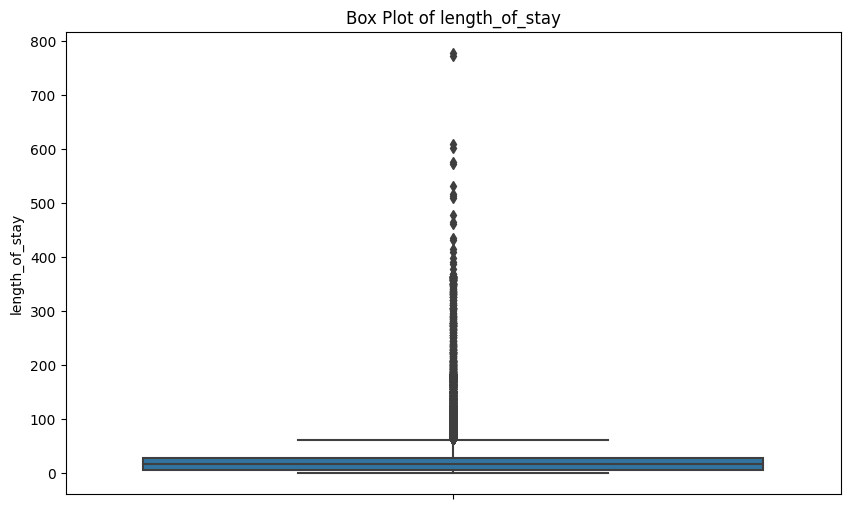

In [27]:
column_name = 'length_of_stay'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column_name)
plt.title(f'Box Plot of {column_name}')
plt.ylabel(column_name)
plt.show()

In [28]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [29]:
df.select_dtypes(include=['int64','float64']).columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [30]:
dfn=df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration','booking_complete']]

c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



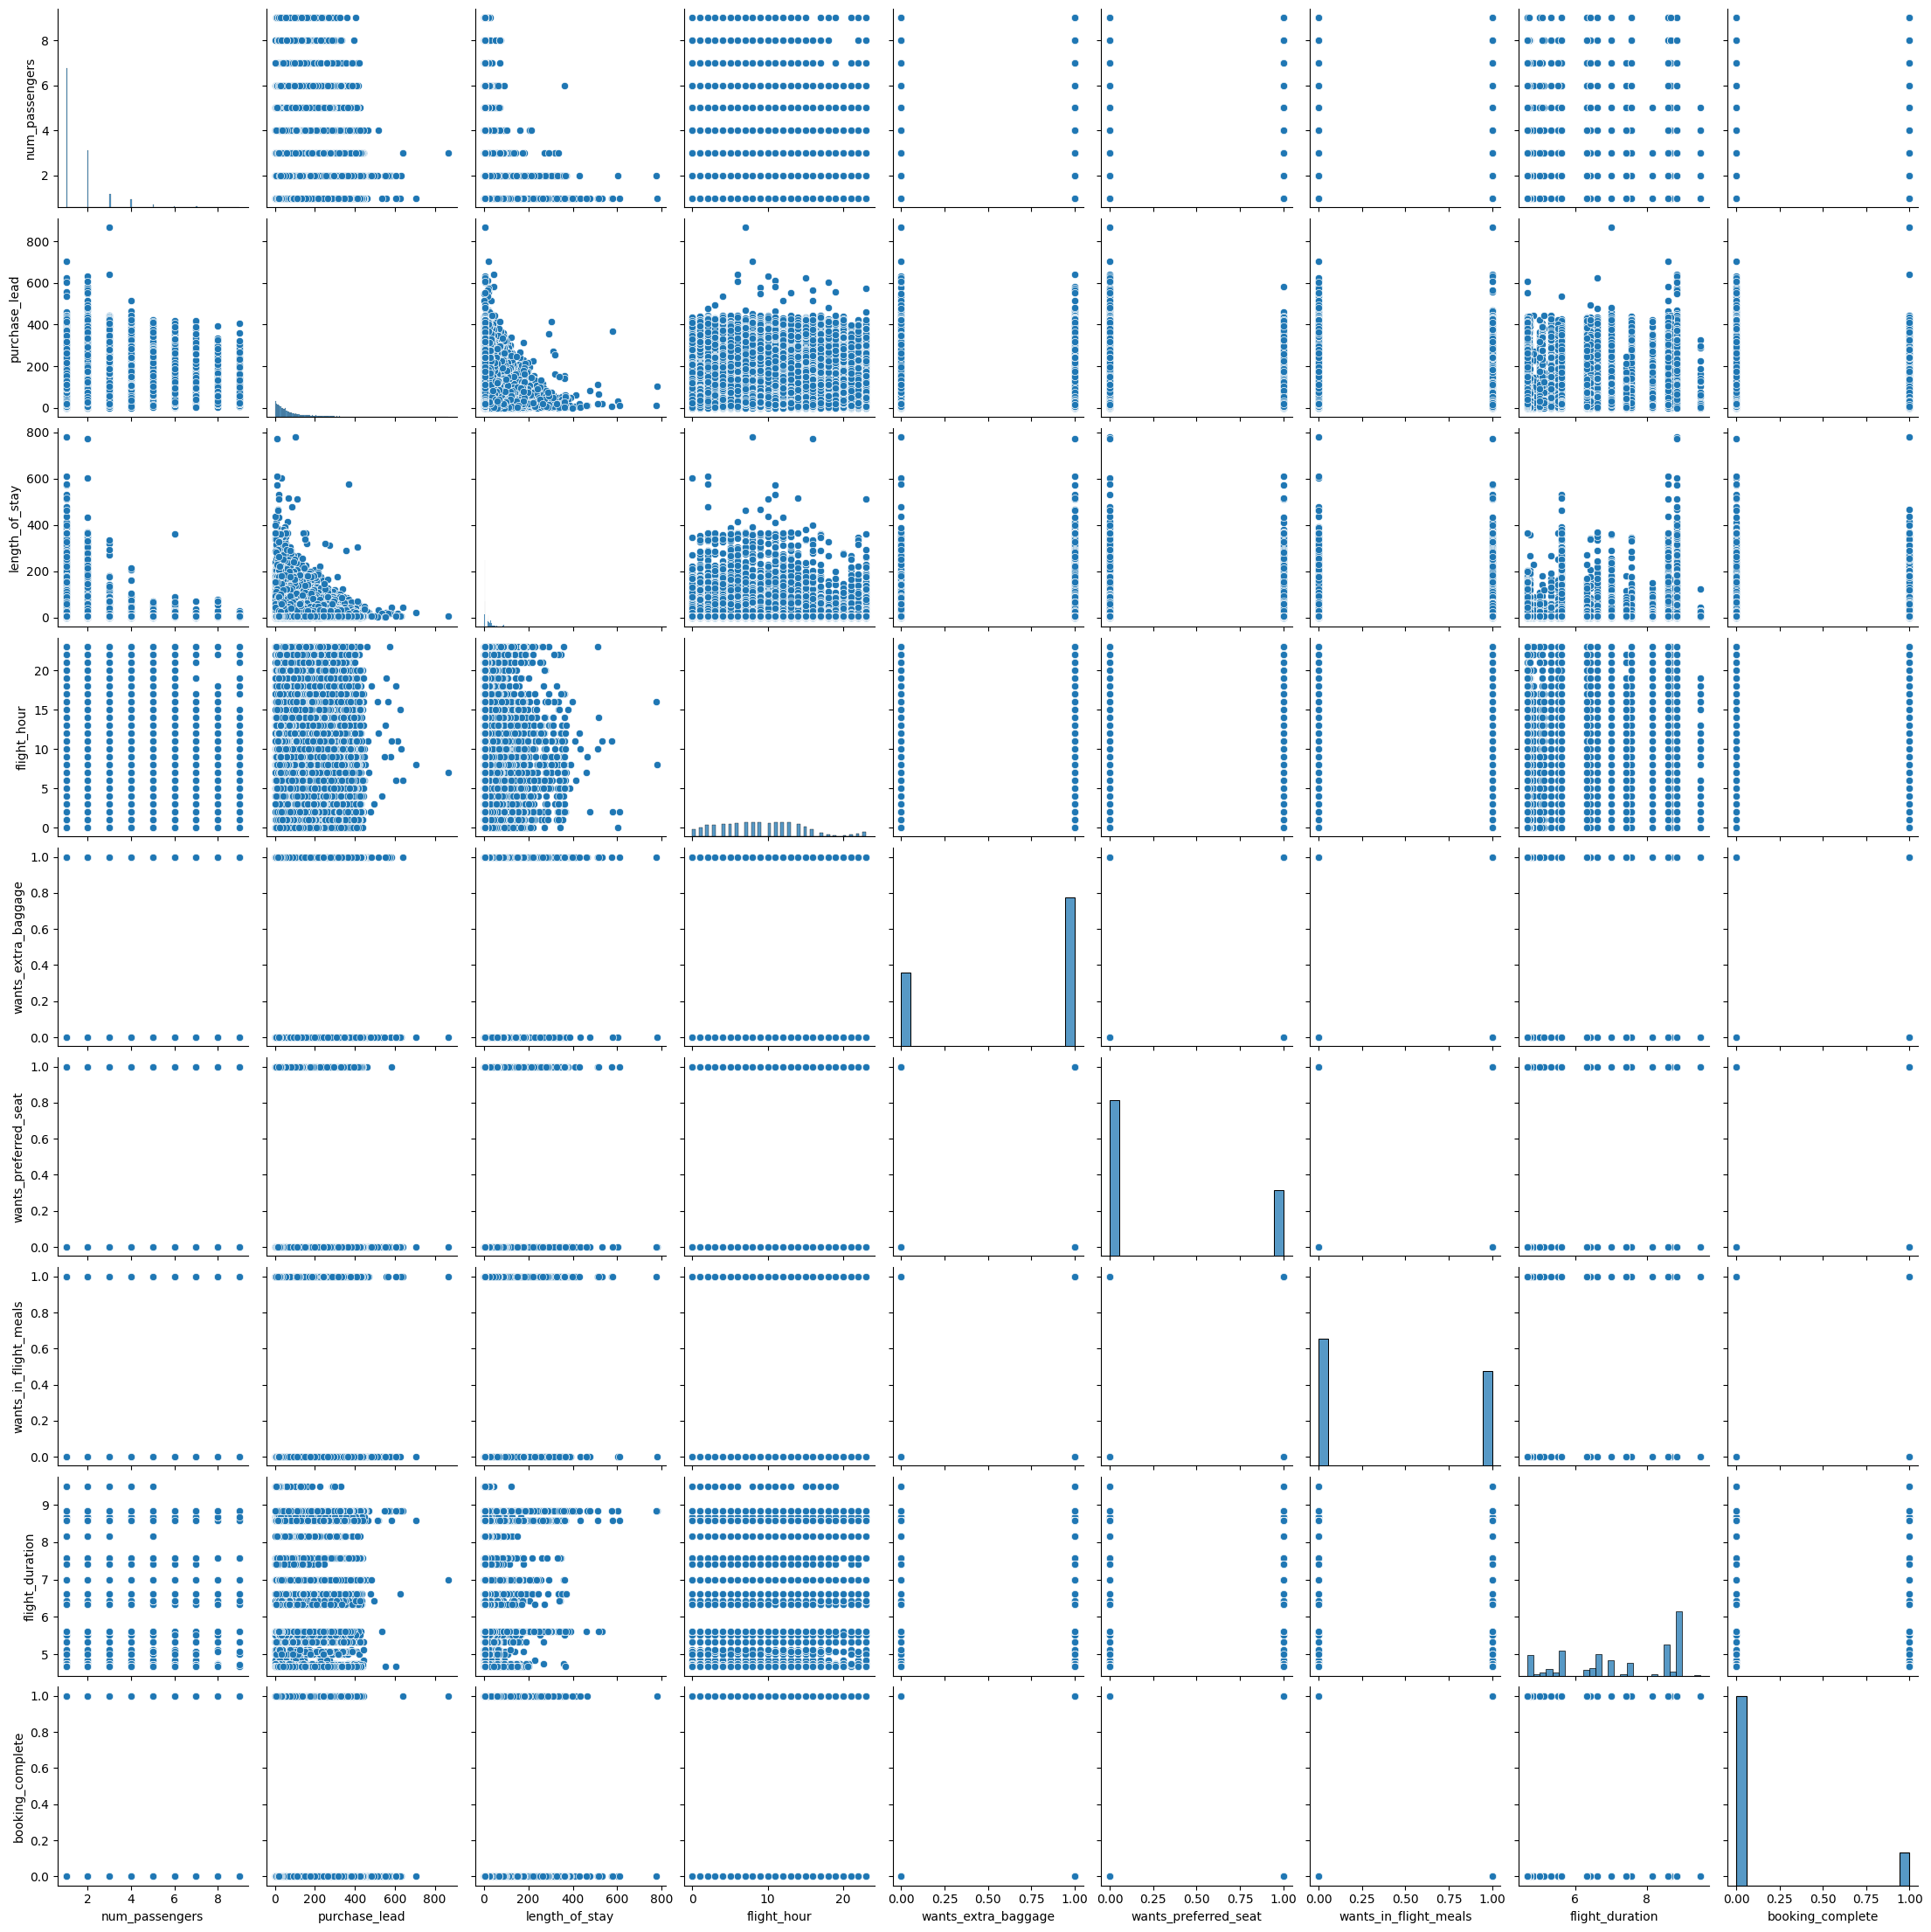

In [31]:
sns.pairplot(dfn)
plt.show()

In [32]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [33]:
df['preferred_services'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].any(axis=1)
df['preferred_services'] = df['preferred_services'].map({True: 1, False: 0})

In [34]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,preferred_services
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1


In [35]:
mapp={0:'No extra service',1:'Extra service'}
colors=['#ffpdff','#ff6900']
label=list(df['preferred_services'].map(mapp).value_counts().index)
value=list(df['preferred_services'].map(mapp).value_counts().values)
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.3,pull=[0.05],marker_colors=colors)])
fig.update_layout(legend=dict(yanchor="bottom", y=0.9, xanchor="left", x=0.4))
fig.show()

<Axes: >

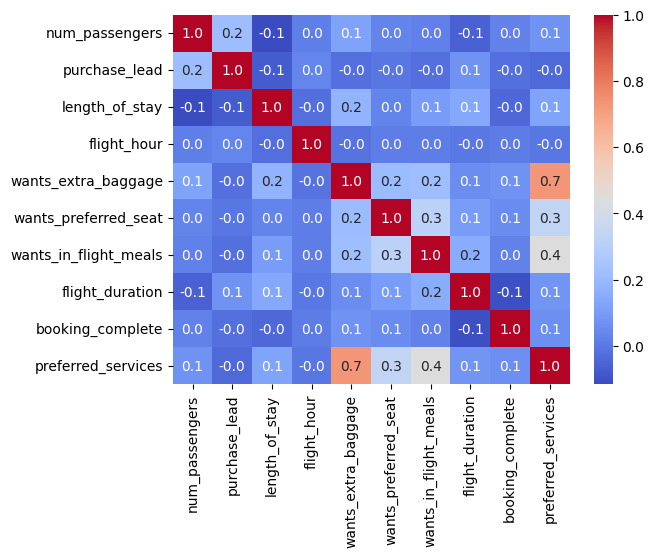

In [36]:
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True,cmap='coolwarm',fmt=".1f")

c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



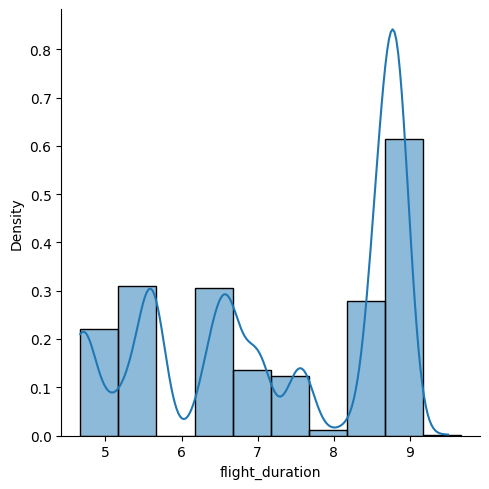

In [37]:
sns.displot(df['flight_duration'],kind='hist',stat='density',kde=True,binwidth=0.5)
plt.show()

In [38]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,preferred_services
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1


c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



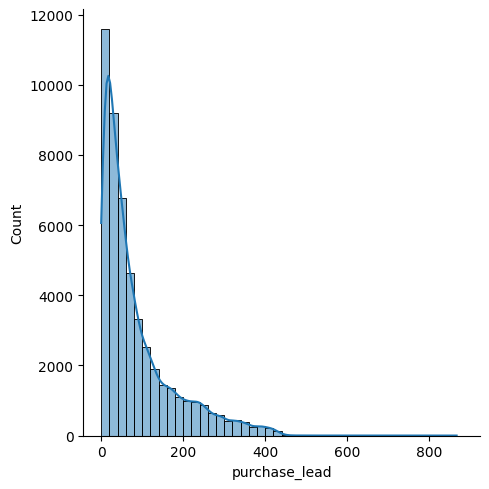

In [39]:
sns.displot(df['purchase_lead'],kind='hist',kde=True,binwidth=20)
plt.show()

c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



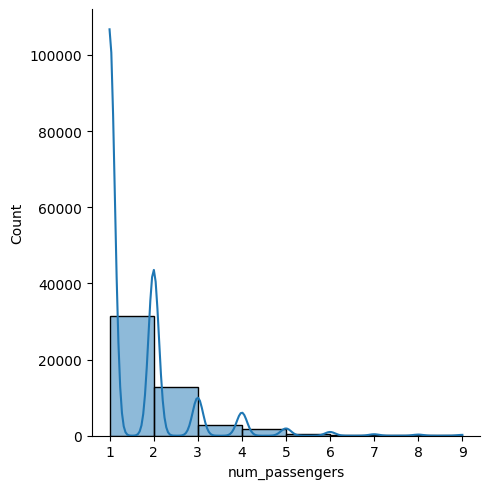

In [40]:
sns.displot(df['num_passengers'],kind='hist',kde=True,binwidth=1)
plt.show()

In [41]:
df1=df.copy()

In [42]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

Feature num_passengers
Lower border -  -0.5 
Upper border -  3.5 
Number of anomalies -  2903


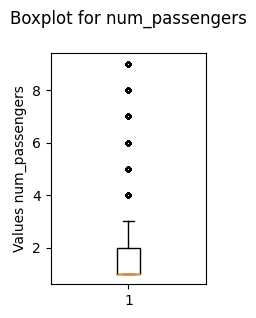

----------------------------------------
Feature sales_channel
Categorical feature
----------------------------------------
Feature trip_type
Categorical feature
----------------------------------------
Feature purchase_lead
Lower border -  -120.0 
Upper border -  256.0 
Number of anomalies -  3456


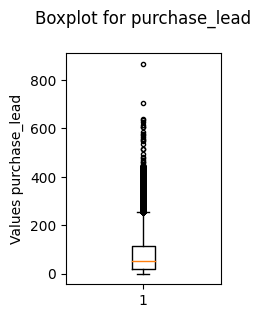

----------------------------------------
Feature length_of_stay
Lower border -  -29.5 
Upper border -  62.5 
Number of anomalies -  3807


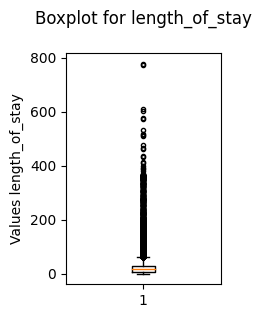

----------------------------------------
Feature flight_hour
Lower border -  -7.0 
Upper border -  25.0 
Number of anomalies -  0


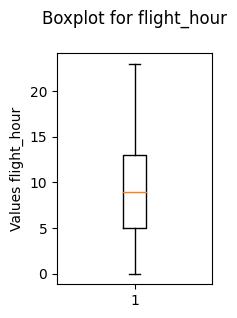

----------------------------------------
Feature flight_day
Categorical feature
----------------------------------------
Feature route
Categorical feature
----------------------------------------
Feature booking_origin
Categorical feature
----------------------------------------
Feature wants_extra_baggage
Lower border -  -1.5 
Upper border -  2.5 
Number of anomalies -  0


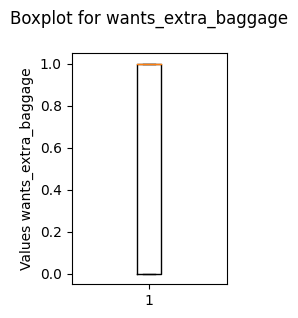

----------------------------------------
Feature wants_preferred_seat
Lower border -  -1.5 
Upper border -  2.5 
Number of anomalies -  0


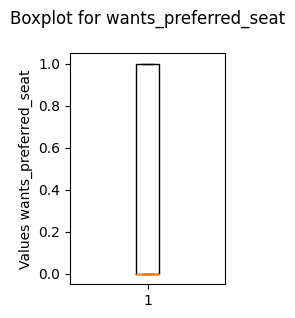

----------------------------------------
Feature wants_in_flight_meals
Lower border -  -1.5 
Upper border -  2.5 
Number of anomalies -  0


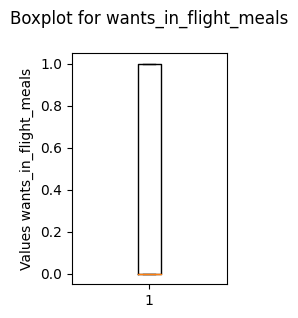

----------------------------------------
Feature flight_duration
Lower border -  0.8050000000000006 
Upper border -  13.645 
Number of anomalies -  0


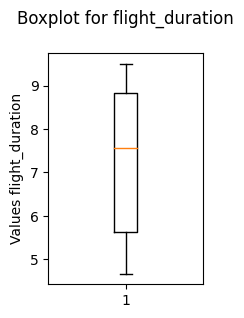

----------------------------------------
Feature booking_complete
Lower border -  0.0 
Upper border -  0.0 
Number of anomalies -  7478


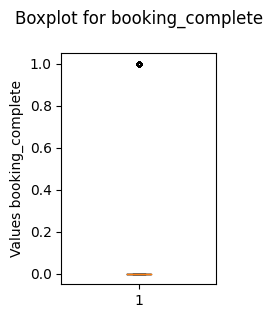

----------------------------------------
Feature preferred_services
Lower border -  1.0 
Upper border -  1.0 
Number of anomalies -  10455


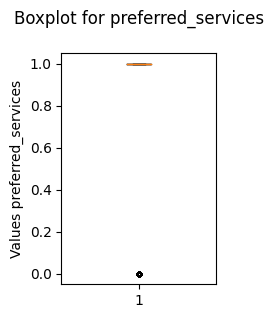

----------------------------------------


In [43]:
for feat in df.columns:
    try:
        print('Feature', feat)
        boundaries = calculate_outliers(df[feat])
        outlier = (df[feat] < boundaries[0]) | (df[feat] > boundaries[1])
        print('Lower border - ', boundaries[0], '\nUpper border - ', boundaries[1], '\nNumber of anomalies - ', outlier.sum())
    
        plt.figure(figsize=(2, 3))
        plt.boxplot(df[feat], sym='.')
        plt.ylabel('Values ' + feat) 
        plt.title('Boxplot for ' + feat + '\n')
        plt.show();
        print(f'{"-" * 40}')
    except:
        print('Categorical feature')
        print(f'{"-" * 40}')

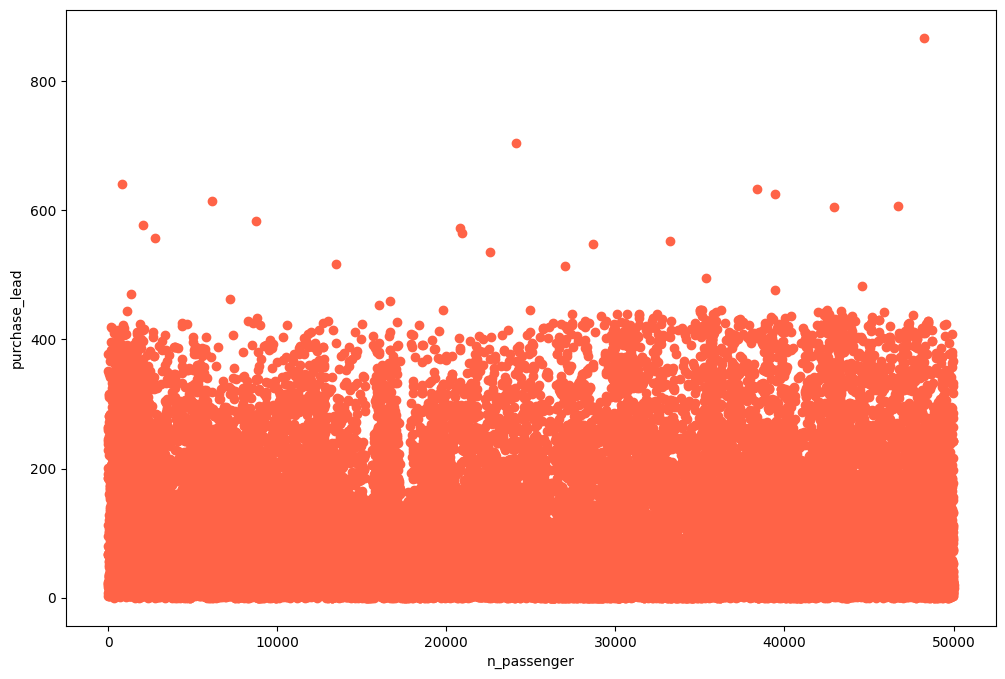

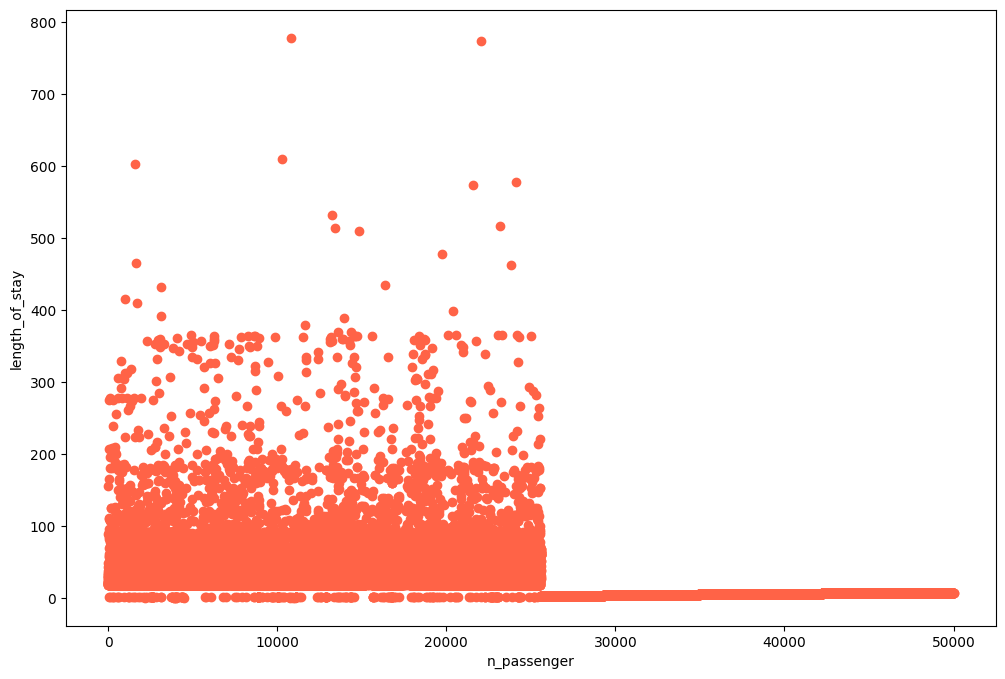

In [44]:
col = ['purchase_lead', 'length_of_stay']

for feat in col:
    try:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.scatter(df.index, df[feat],c='tomato')
        plt.xlabel('n_passenger')
        plt.ylabel(feat)
        plt.show();
    except:
        print('Categorical feature')

In [45]:
df = df[df['purchase_lead'] <= 445]
df = df[df['length_of_stay'] <= 365]

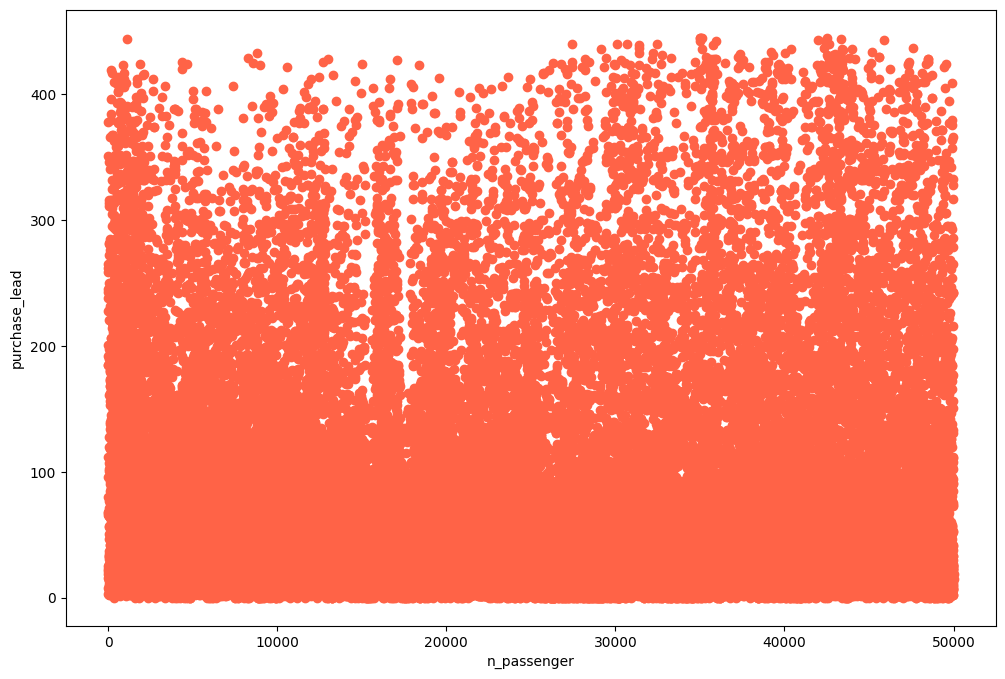

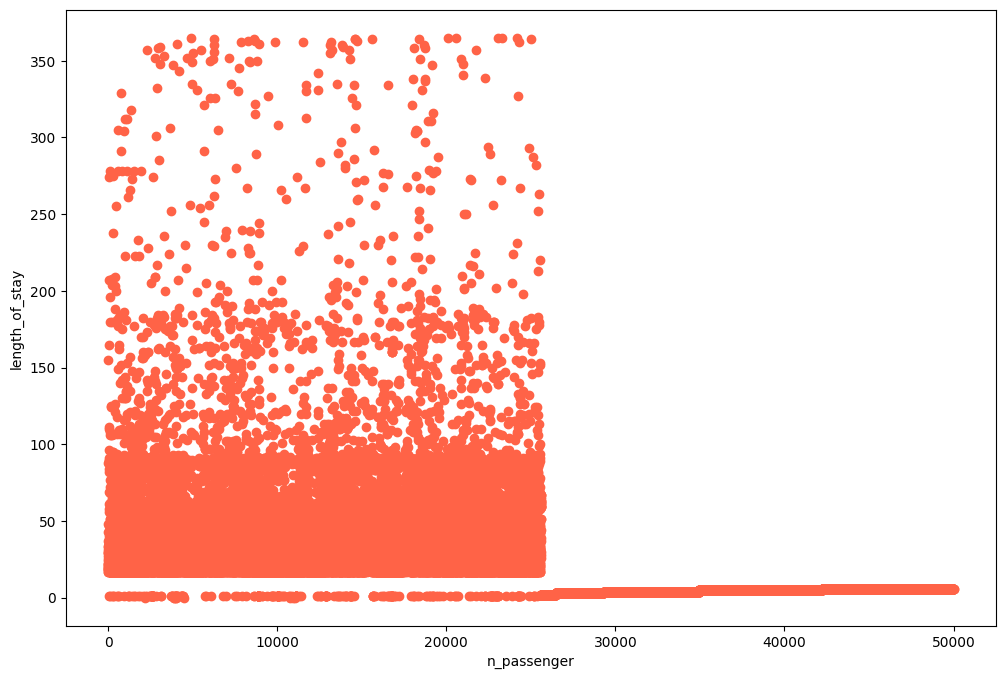

In [46]:
for feat in col:
    try:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.scatter(df.index, df[feat],c='tomato')
        plt.xlabel('n_passenger')
        plt.ylabel(feat)
        plt.show();
    except:
        print('Categorical feature')

In [47]:
success = df.groupby(['purchase_lead'], as_index=False)['booking_complete'].mean()

In [48]:
success

,purchase_lead,booking_complete
0,0,0.113514
1,1,0.147661
2,2,0.177877
3,3,0.197917
4,4,0.200000
...,...,...
439,440,0.200000
440,442,0.333333
441,443,0.000000
442,444,0.500000


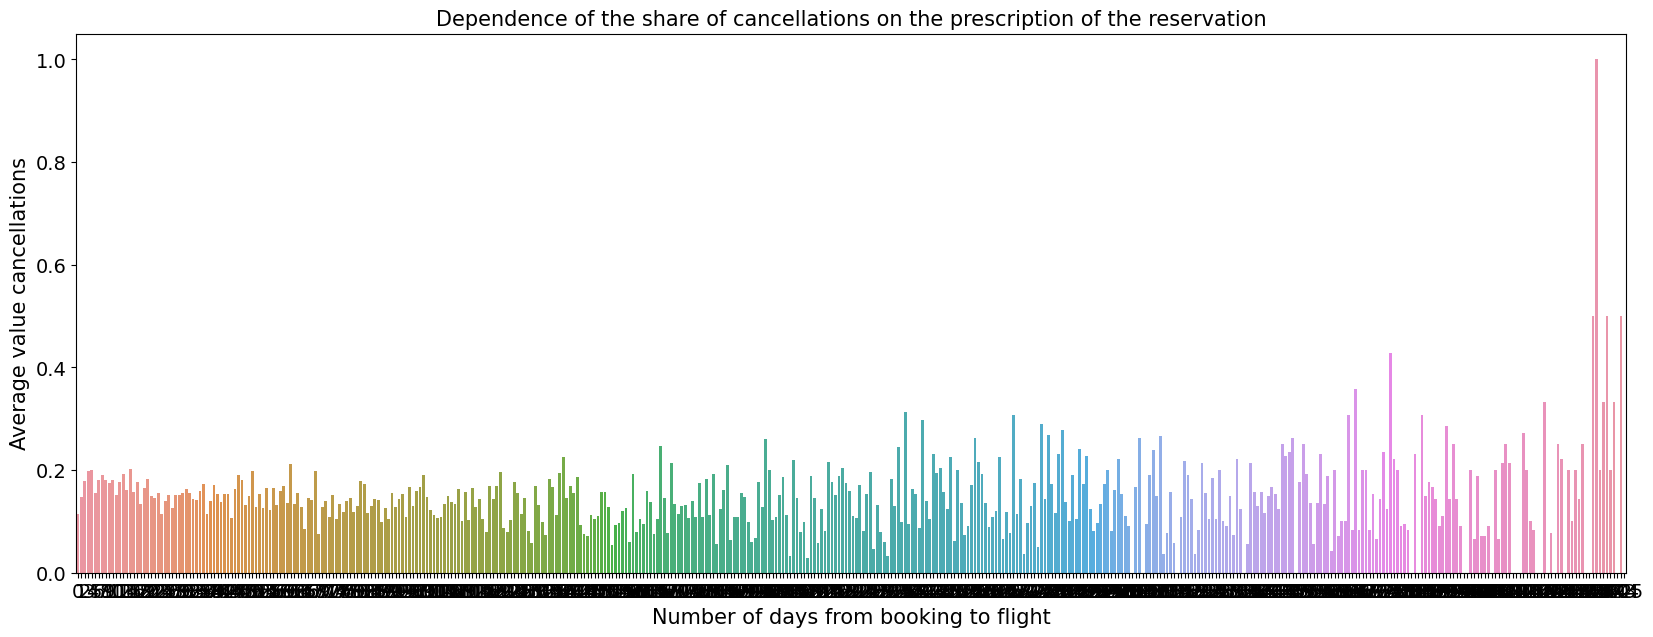

In [49]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=success['purchase_lead'], y=success['booking_complete'])
ax.set_xlabel('Number of days from booking to flight', fontsize = 15)
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)


In [50]:
df['purchase_lead']=df['purchase_lead'].apply(lambda x: int(round(x/30,0)))

df['purchase_lead'].value_counts()

purchase_lead
1     13234
0      9394
2      8680
3      4756
4      3522
5      2088
6      1923
8      1457
7      1427
9       935
10      743
11      628
12      476
13      383
14      276
15       27
Name: count, dtype: int64

In [51]:
success = df.groupby(['purchase_lead'], as_index=False).agg({'booking_complete': 'mean'})
success

,purchase_lead,booking_complete
0,0,0.175538
1,1,0.149615
2,2,0.147811
3,3,0.136880
4,4,0.132311
5,5,0.129310
6,6,0.131045
7,7,0.140855
8,8,0.144818
9,9,0.159358


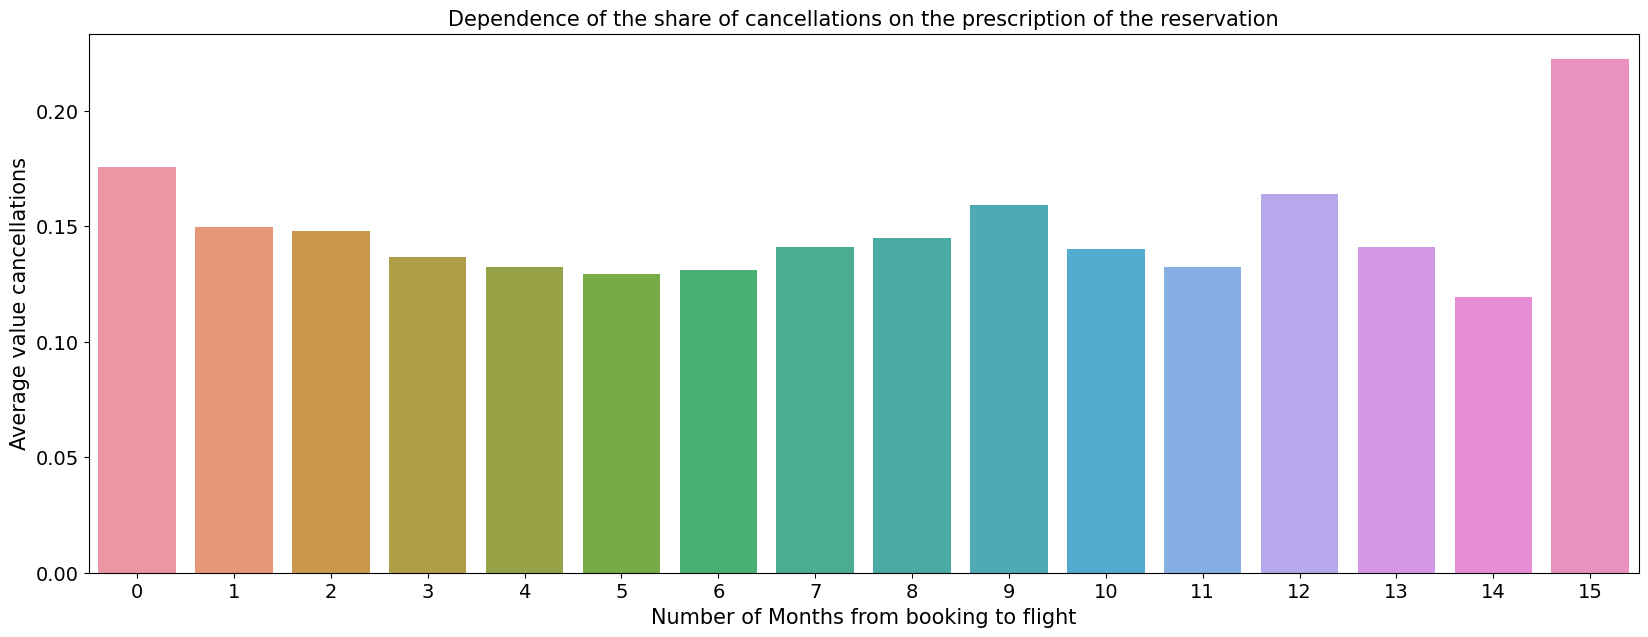

In [52]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=success['purchase_lead'], y=success['booking_complete'])
ax.set_xlabel('Number of Months from booking to flight', fontsize = 15)
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)

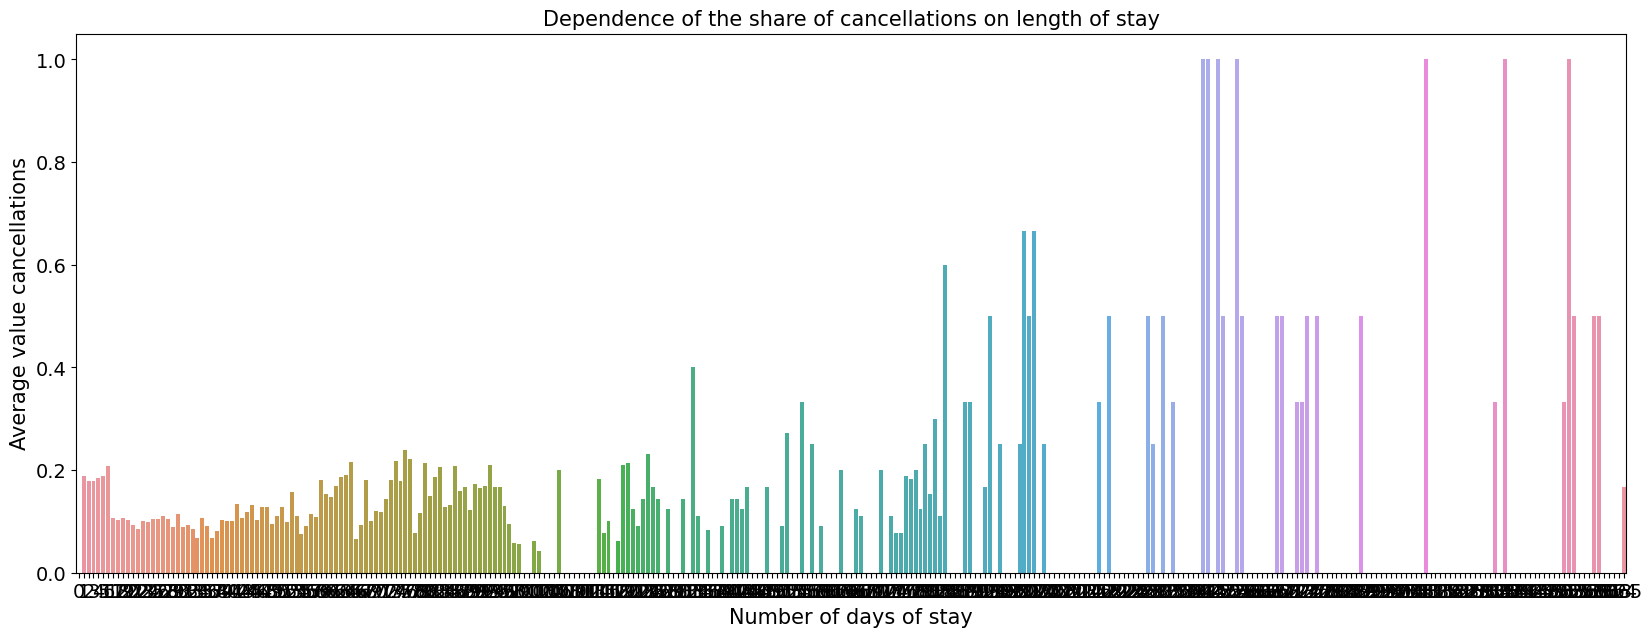

In [53]:
stat = df.groupby(['length_of_stay'], as_index=False).agg({'booking_complete': 'mean'})

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=stat['length_of_stay'], y=stat['booking_complete'])
ax.set_xlabel('Number of days of stay', fontsize = 15)
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on length of stay', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)



In [54]:
df['length_of_stay']=df['length_of_stay'].apply(lambda x : (x <=7 and 'under week') or
                                                (x>7 and x <=31 and 'one-week - 1 month') or
                                                (x>31 and x<= 60 and '1 month-2 month')or
                                                (x>60 and x<=90 and '2 month -3 month') or 'more than 3 month')

In [55]:
df['length_of_stay'].value_counts()
stat=df.groupby(['length_of_stay'],as_index=False).agg({'booking_complete':'mean'})
stat

,length_of_stay,booking_complete
0,1 month-2 month,0.103148
1,2 month -3 month,0.159674
2,more than 3 month,0.120291
3,one-week - 1 month,0.100570
4,under week,0.191801


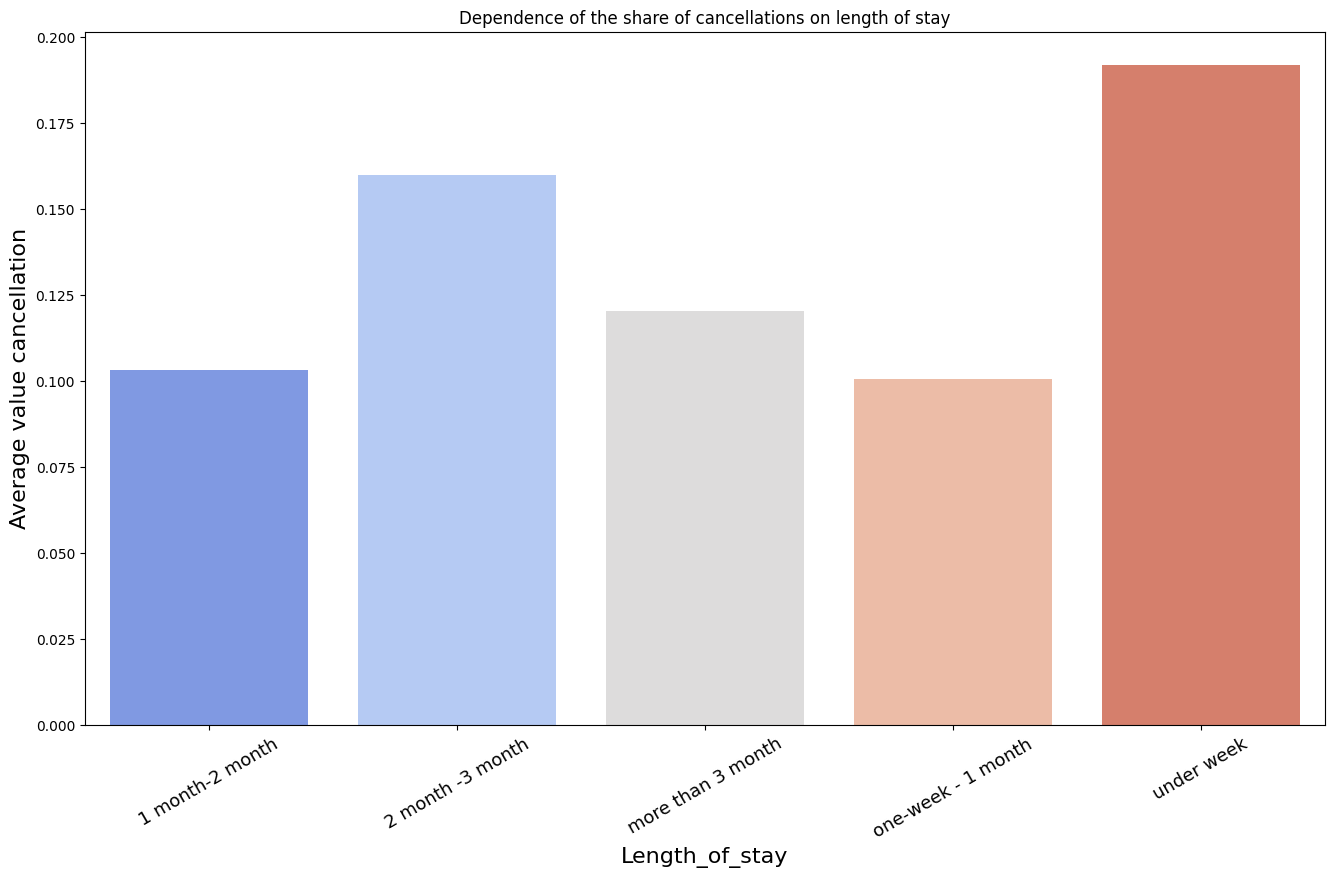

In [56]:
fig,ax=plt.subplots(figsize=(16,9))
sns.barplot(x=stat['length_of_stay'],y=stat['booking_complete'],palette='coolwarm')
ax.set_xlabel('Length_of_stay',fontsize=16)
ax.set_ylabel('Average value cancellation',fontsize=16)
ax.set_title('Dependence of the share of cancellations on length of stay')
plt.xticks(fontsize=13,rotation=30)
plt.show()

In [57]:
df['departure'] = df.route.apply(lambda x: x[:3])
df['arrival'] = df.route.apply(lambda x: x[3:])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,preferred_services,departure,arrival
0,2,Internet,RoundTrip,9,one-week - 1 month,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1,AKL,DEL
1,1,Internet,RoundTrip,4,one-week - 1 month,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,AKL,DEL
2,2,Internet,RoundTrip,8,one-week - 1 month,17,Wed,AKLDEL,India,1,1,0,5.52,0,1,AKL,DEL
3,1,Internet,RoundTrip,3,one-week - 1 month,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1,AKL,DEL
4,2,Internet,RoundTrip,2,one-week - 1 month,15,Wed,AKLDEL,India,1,0,1,5.52,0,1,AKL,DEL


In [58]:
cat_col=list(df.select_dtypes(include='object').columns)
cat_col

['sales_channel',
 'trip_type',
 'length_of_stay',
 'flight_day',
 'route',
 'booking_origin',
 'departure',
 'arrival']

In [59]:
encoder = TargetEncoder(smoothing = 0.5)
for elem in cat_col:
    df[elem+'_encoding'] = encoder.fit_transform(df[elem], df['booking_complete'])

In [60]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,departure,arrival,sales_channel_encoding,trip_type_encoding,length_of_stay_encoding,flight_day_encoding,route_encoding,booking_origin_encoding,departure_encoding,arrival_encoding
0,2,Internet,RoundTrip,9,one-week - 1 month,7,Sat,AKLDEL,New Zealand,1,...,AKL,DEL,0.154773,0.150568,0.10057,0.148320,0.074776,0.050373,0.200211,0.096
1,1,Internet,RoundTrip,4,one-week - 1 month,3,Sat,AKLDEL,New Zealand,0,...,AKL,DEL,0.154773,0.150568,0.10057,0.148320,0.074776,0.050373,0.200211,0.096
2,2,Internet,RoundTrip,8,one-week - 1 month,17,Wed,AKLDEL,India,1,...,AKL,DEL,0.154773,0.150568,0.10057,0.163124,0.074776,0.103639,0.200211,0.096
3,1,Internet,RoundTrip,3,one-week - 1 month,4,Sat,AKLDEL,New Zealand,0,...,AKL,DEL,0.154773,0.150568,0.10057,0.148320,0.074776,0.050373,0.200211,0.096
4,2,Internet,RoundTrip,2,one-week - 1 month,15,Wed,AKLDEL,India,1,...,AKL,DEL,0.154773,0.150568,0.10057,0.163124,0.074776,0.103639,0.200211,0.096


In [61]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'preferred_services', 'departure', 'arrival', 'sales_channel_encoding',
       'trip_type_encoding', 'length_of_stay_encoding', 'flight_day_encoding',
       'route_encoding', 'booking_origin_encoding', 'departure_encoding',
       'arrival_encoding'],
      dtype='object')

In [62]:
df.shape

(49949, 25)

In [63]:
df.drop(columns=cat_col,inplace=True)

In [64]:
df.shape

(49949, 17)

In [65]:
df.columns

Index(['num_passengers', 'purchase_lead', 'flight_hour', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'preferred_services', 'sales_channel_encoding',
       'trip_type_encoding', 'length_of_stay_encoding', 'flight_day_encoding',
       'route_encoding', 'booking_origin_encoding', 'departure_encoding',
       'arrival_encoding'],
      dtype='object')

In [66]:
#Dropping the columnprefered service 
df.drop(columns=['preferred_services'],inplace=True)

In [67]:
df.shape

(49949, 16)

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49949.0,1.591283,1.020404,1.000000,1.000000,1.000000,2.000000,9.000000
purchase_lead,49949.0,2.808585,3.025375,0.000000,1.000000,2.000000,4.000000,15.000000
flight_hour,49949.0,9.065026,5.412423,0.000000,5.000000,9.000000,13.000000,23.000000
wants_extra_baggage,49949.0,0.668882,0.470620,0.000000,0.000000,1.000000,1.000000,1.000000
wants_preferred_seat,49949.0,0.297043,0.456960,0.000000,0.000000,0.000000,1.000000,1.000000
wants_in_flight_meals,49949.0,0.427136,0.494667,0.000000,0.000000,0.000000,1.000000,1.000000
flight_duration,49949.0,7.276916,1.496895,4.670000,5.620000,7.570000,8.830000,9.500000
booking_complete,49949.0,0.149553,0.356636,0.000000,0.000000,0.000000,0.000000,1.000000
sales_channel_encoding,49949.0,0.149553,0.014671,0.108320,0.154773,0.154773,0.154773,0.154773
trip_type_encoding,49949.0,0.149553,0.010078,0.043103,0.150568,0.150568,0.150568,0.150568


In [69]:
df.dtypes

num_passengers               int64
purchase_lead                int64
flight_hour                  int64
wants_extra_baggage          int64
wants_preferred_seat         int64
wants_in_flight_meals        int64
flight_duration            float64
booking_complete             int64
sales_channel_encoding     float64
trip_type_encoding         float64
length_of_stay_encoding    float64
flight_day_encoding        float64
route_encoding             float64
booking_origin_encoding    float64
departure_encoding         float64
arrival_encoding           float64
dtype: object

In [70]:
col=list(df.columns)
col

['num_passengers',
 'purchase_lead',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete',
 'sales_channel_encoding',
 'trip_type_encoding',
 'length_of_stay_encoding',
 'flight_day_encoding',
 'route_encoding',
 'booking_origin_encoding',
 'departure_encoding',
 'arrival_encoding']

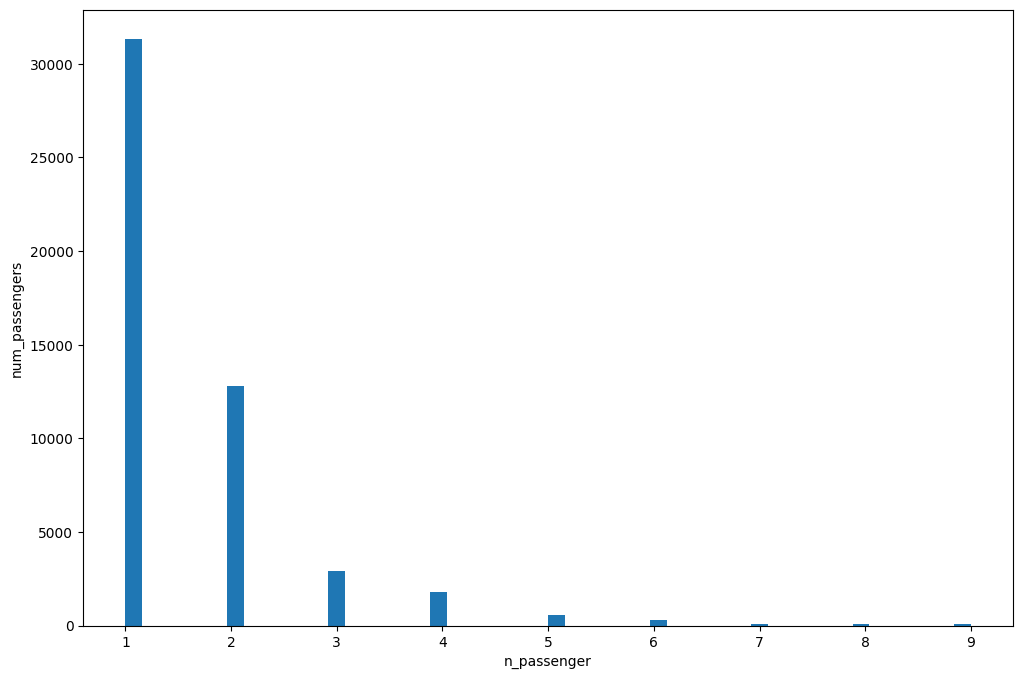

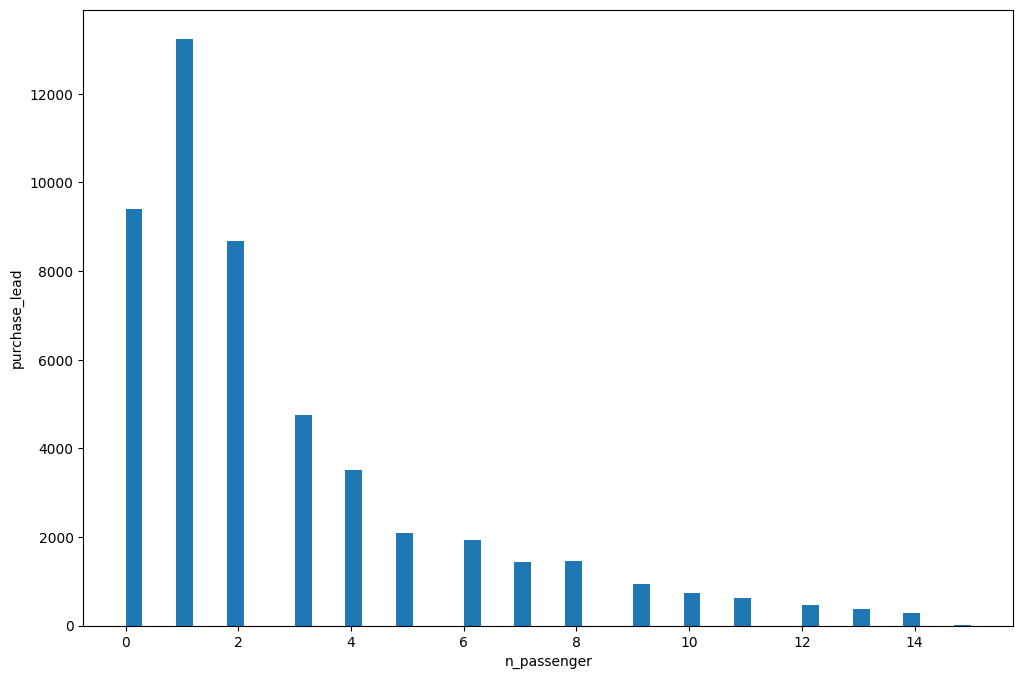

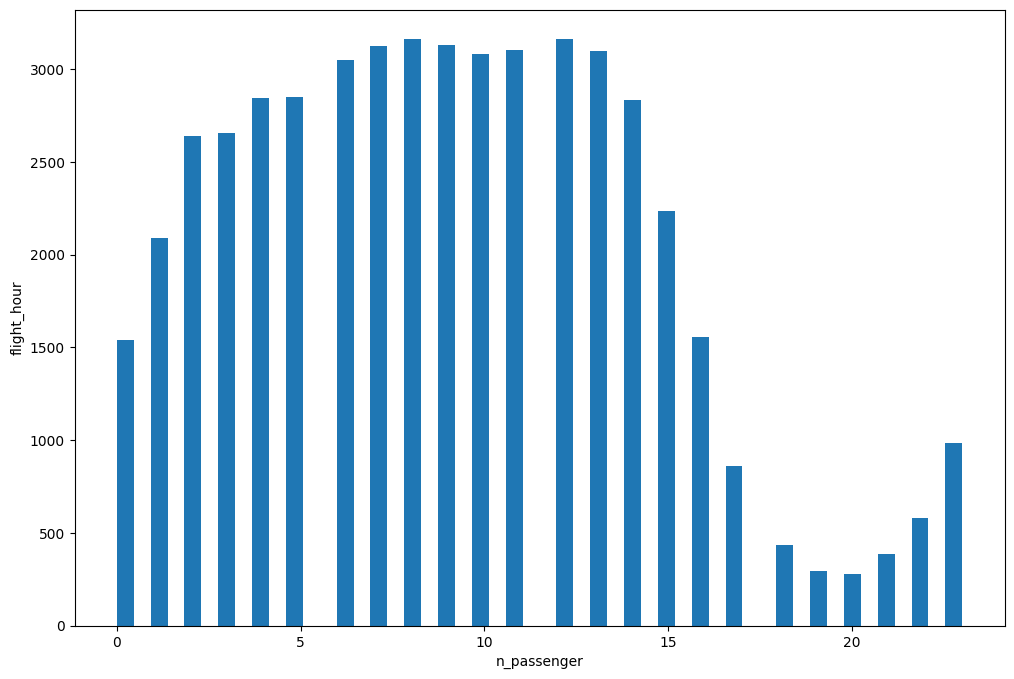

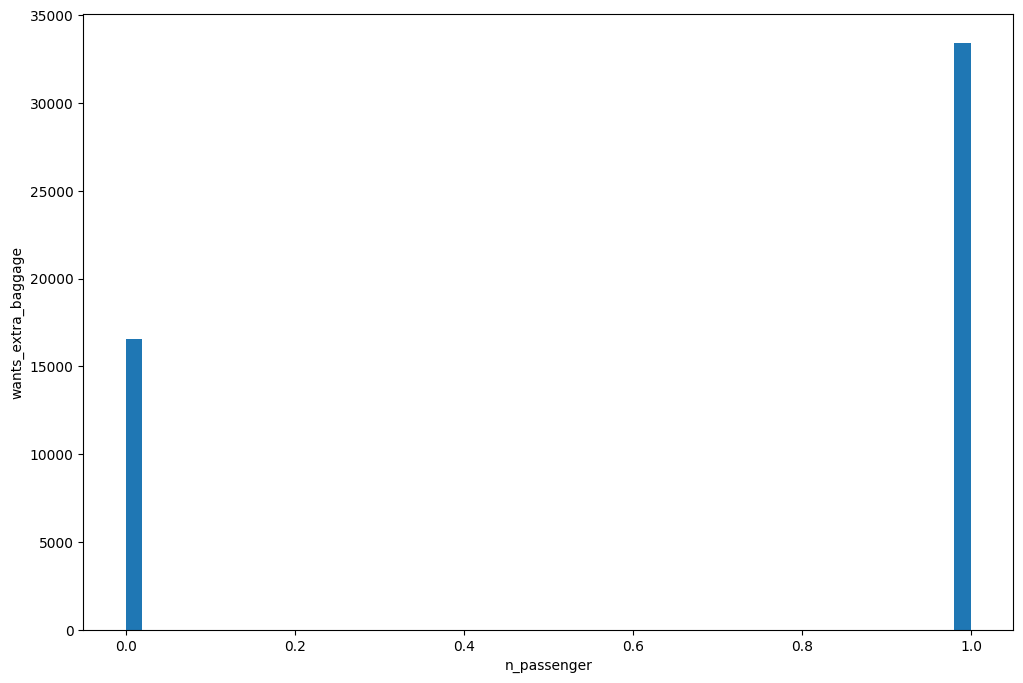

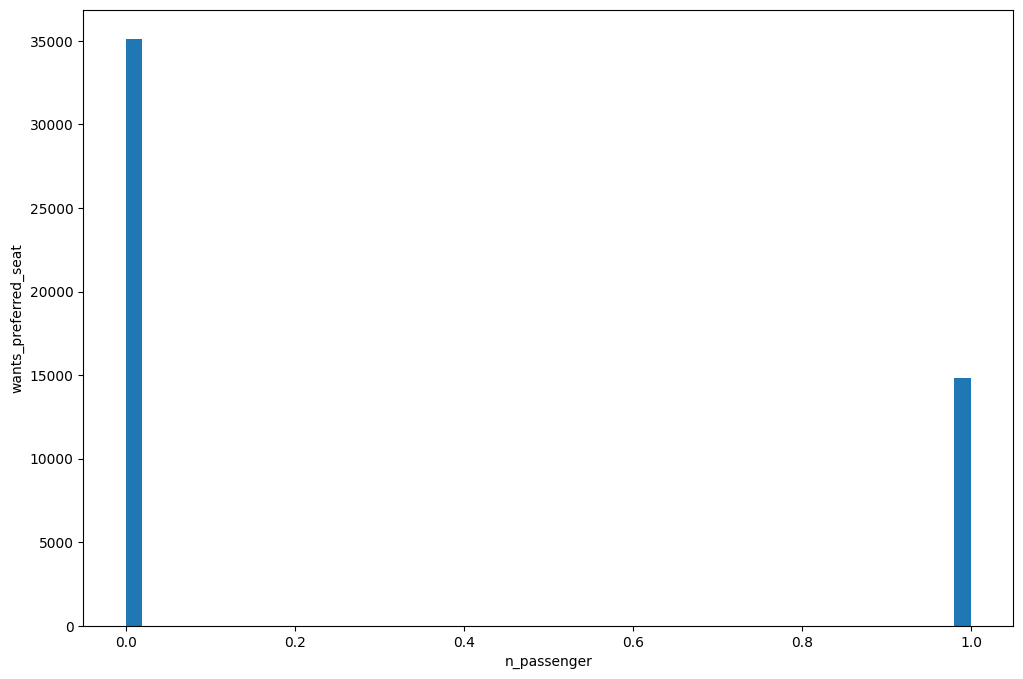

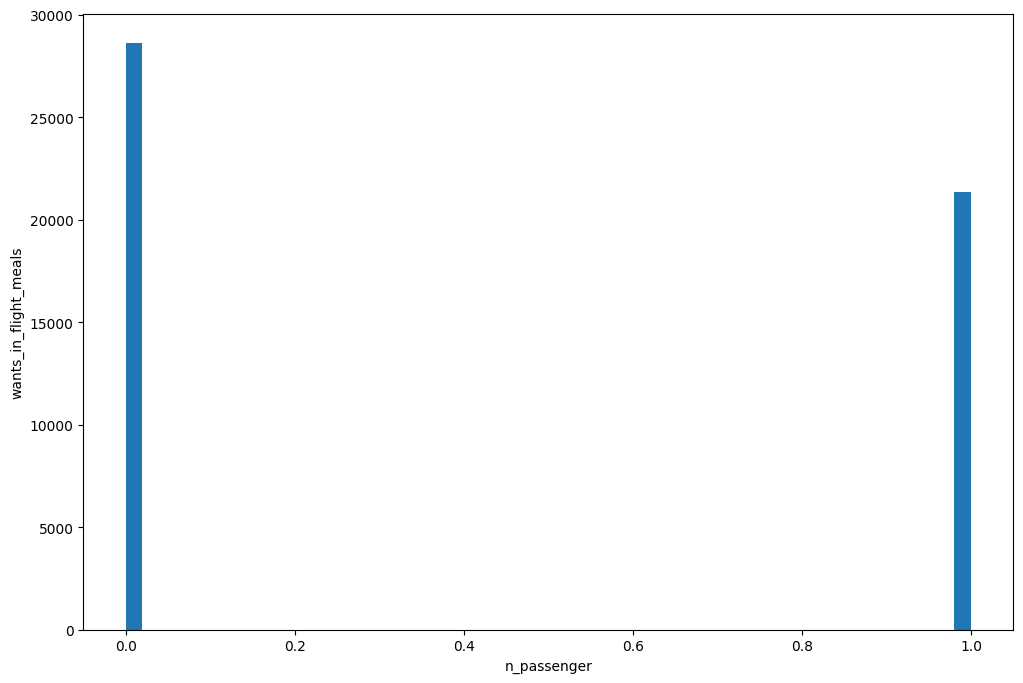

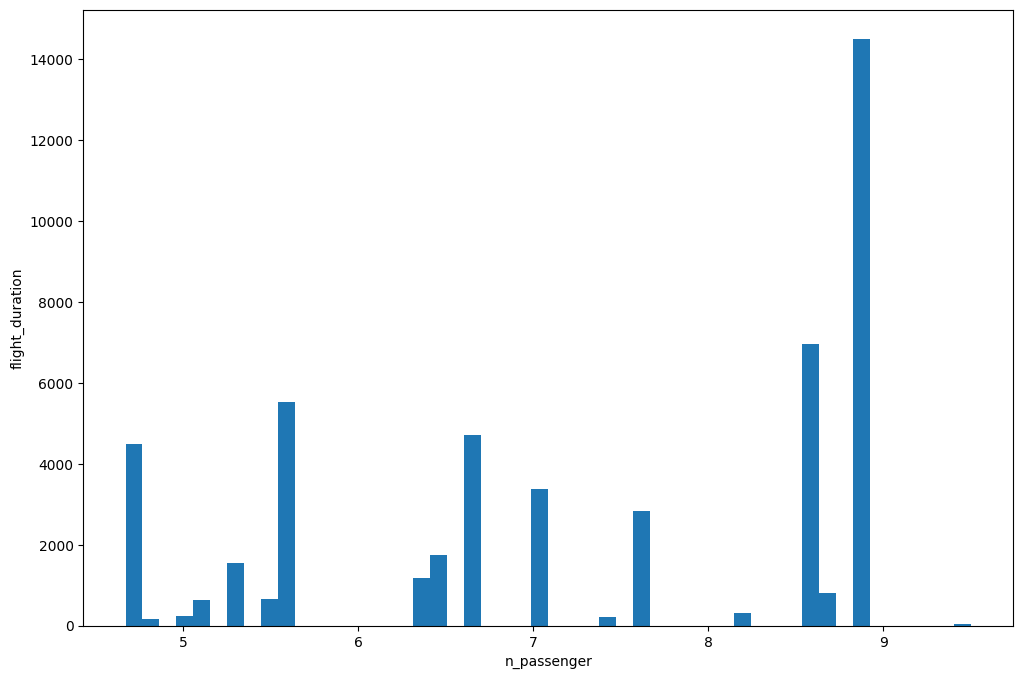

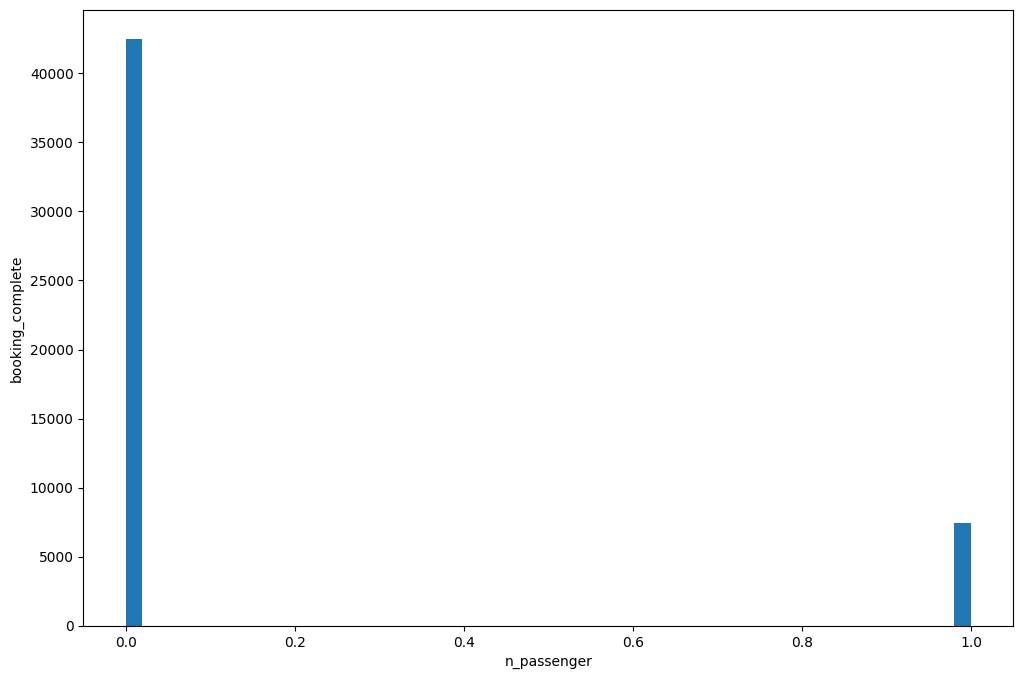

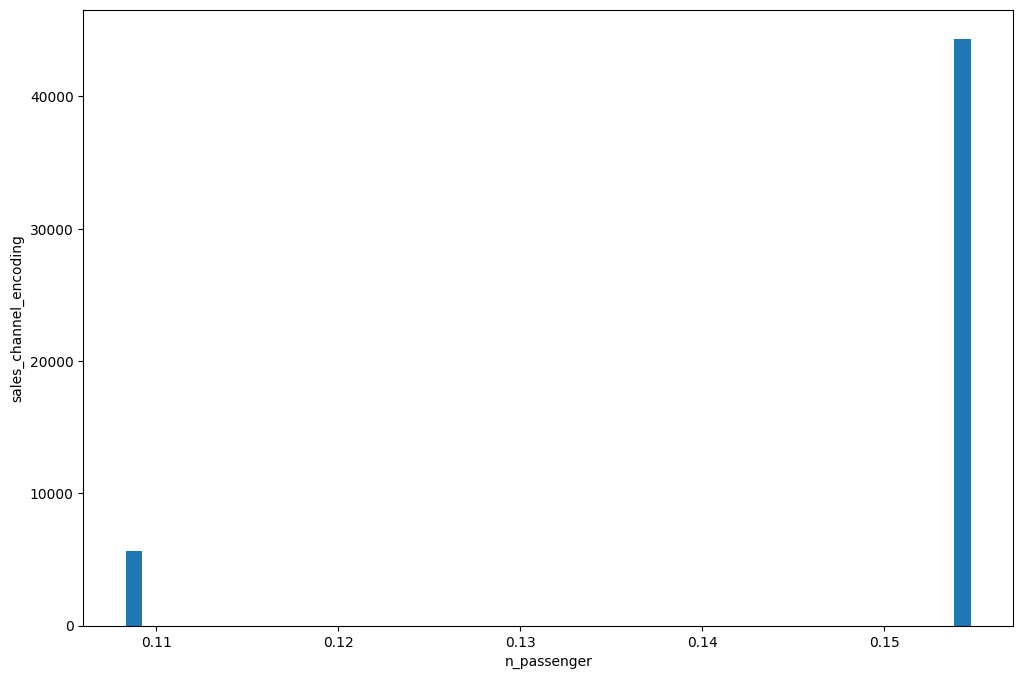

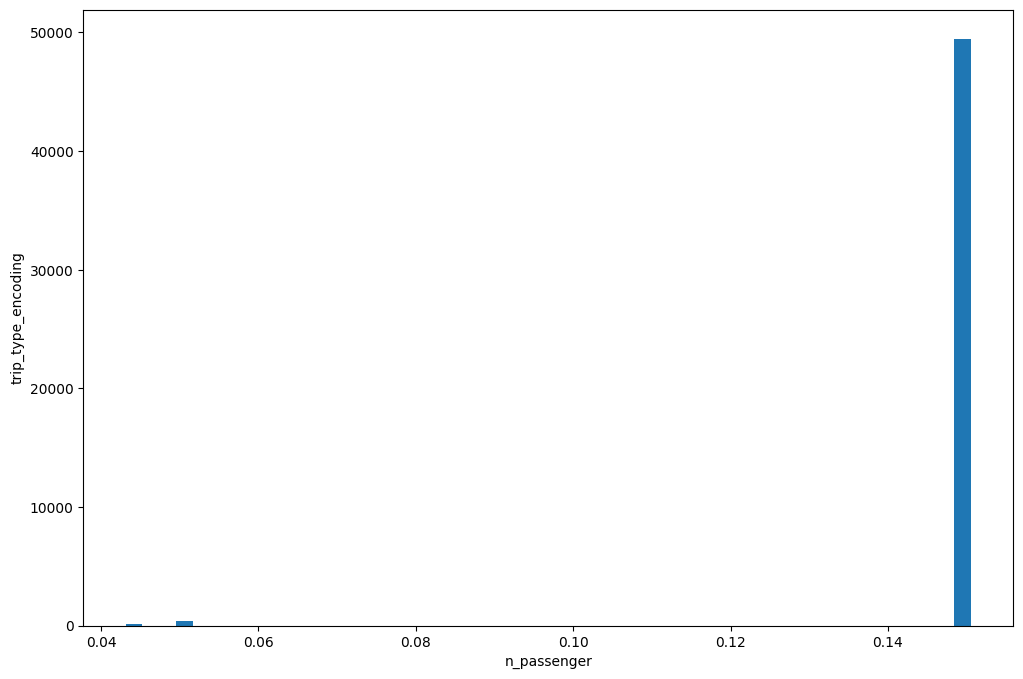

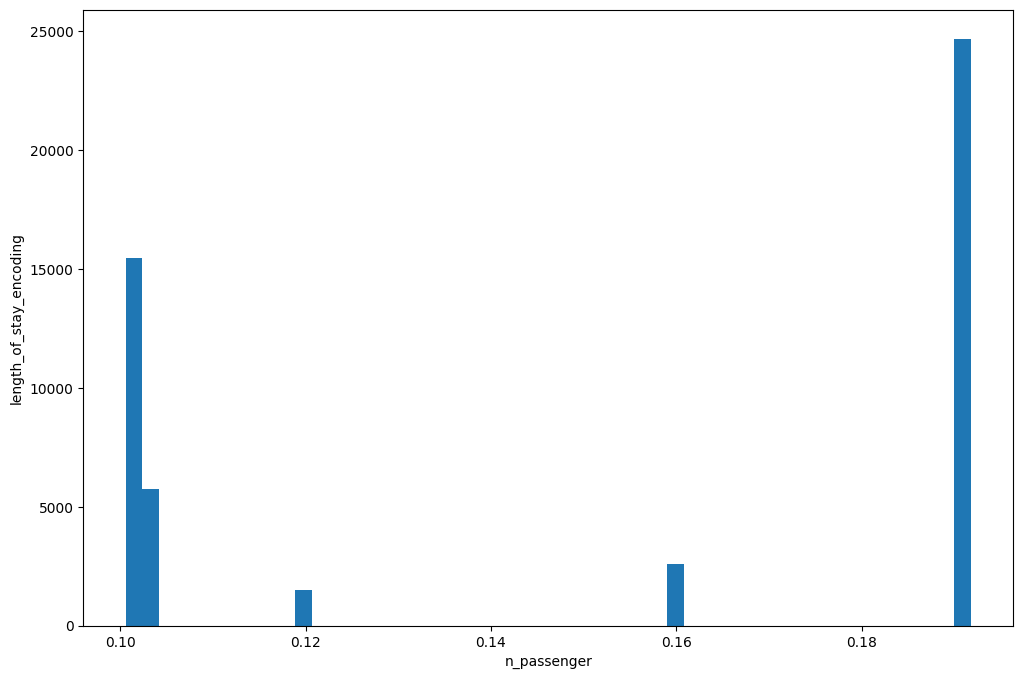

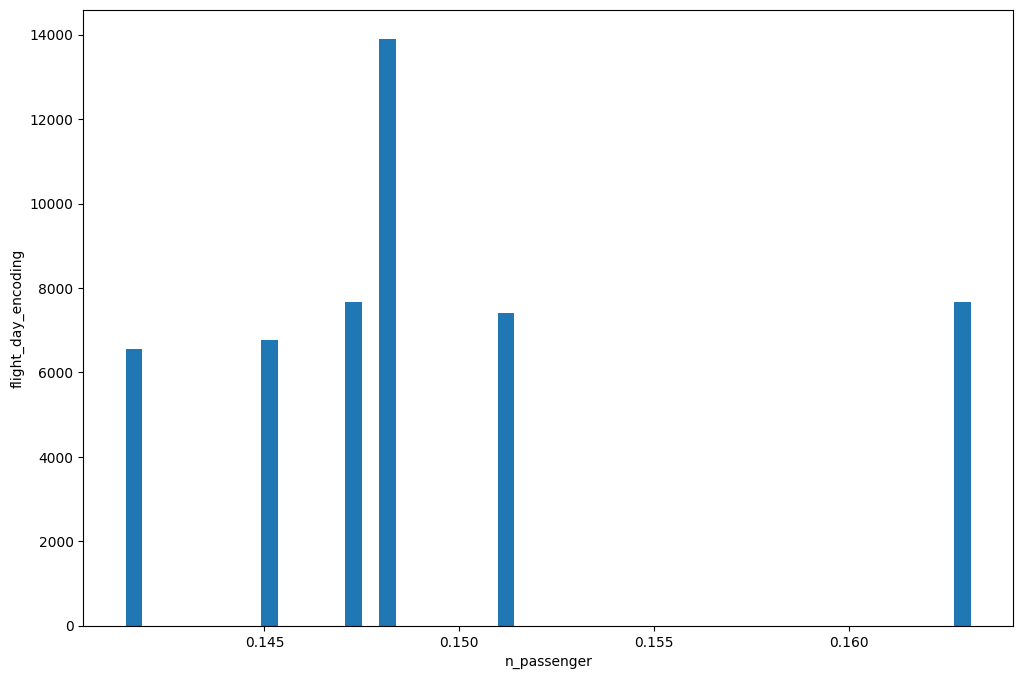

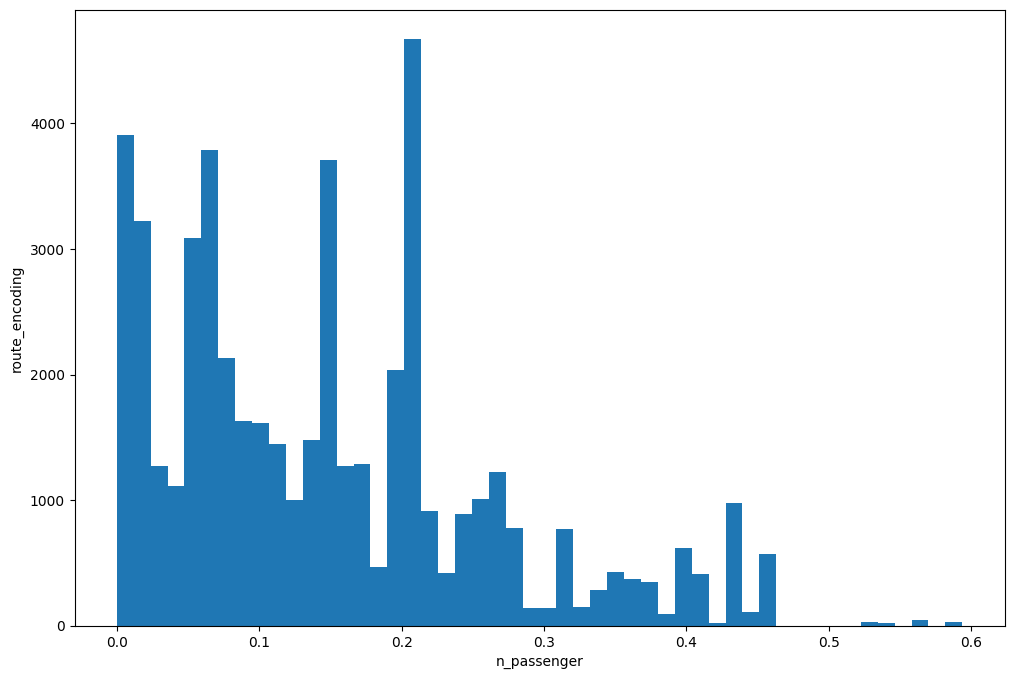

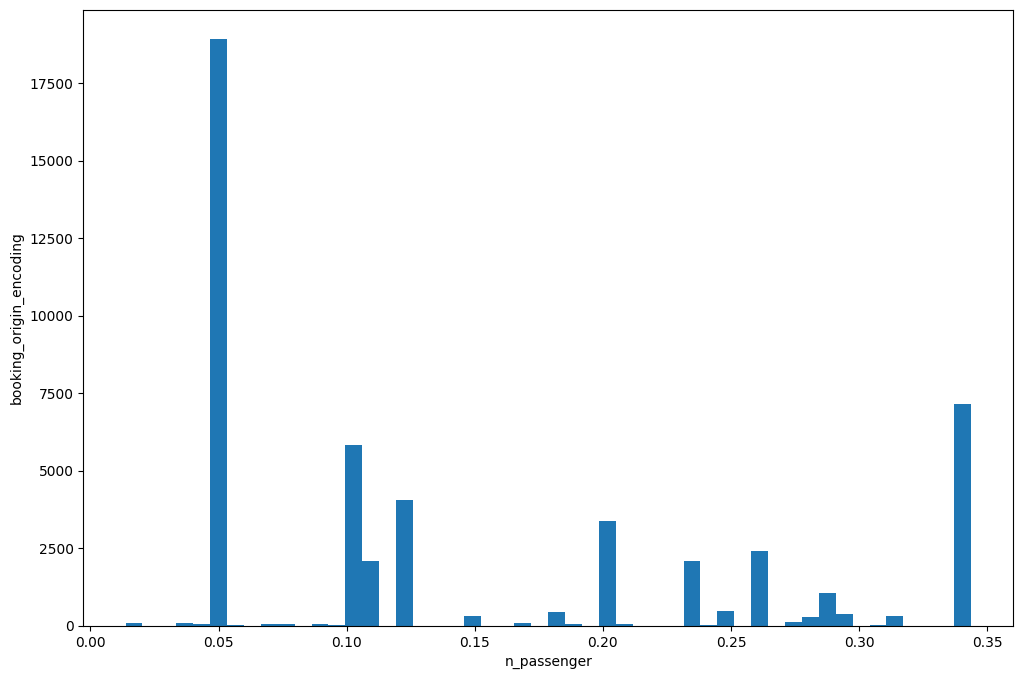

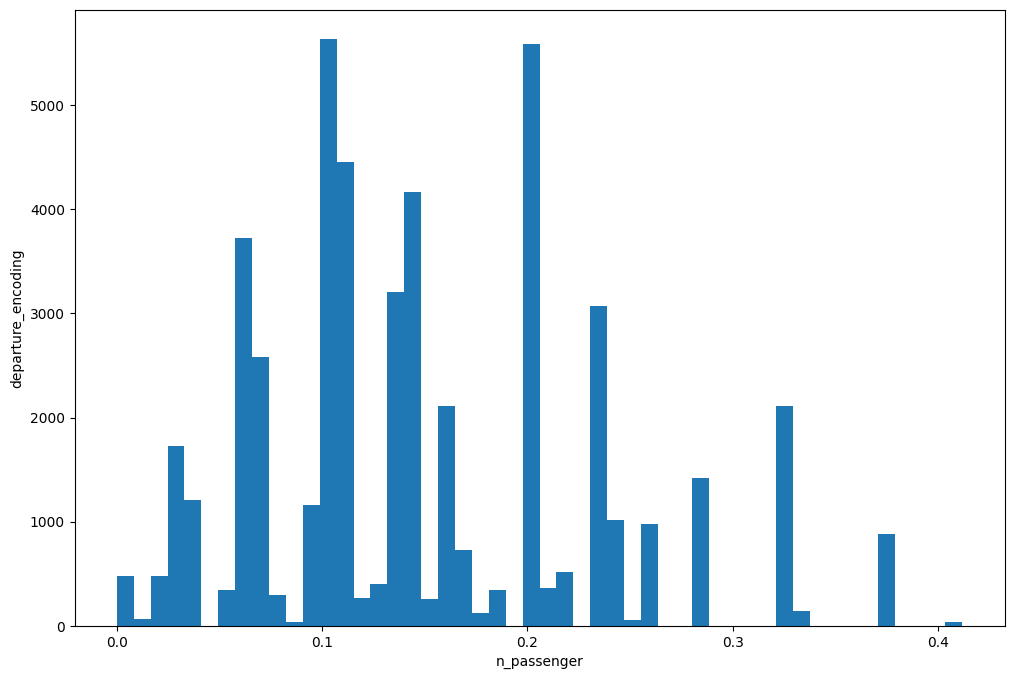

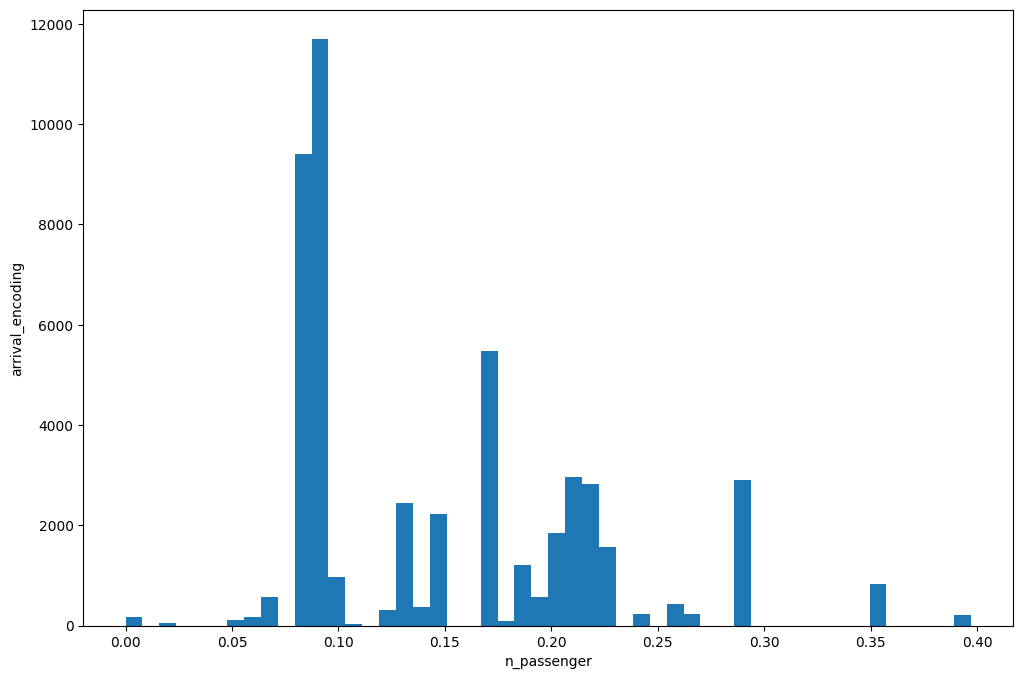

In [71]:
for feat in col:
    try:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.hist(df[feat],bins=50)
        plt.xlabel('n_passenger')
        plt.ylabel(feat)
        plt.show();
    except:
        print('Categorical feature')

In [72]:
y=df['booking_complete']
X=df.drop(columns=['booking_complete'])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
parametrs = { 'penalty':['l2', 'l1'],
              'C': [1E-3, 1E-2, 0.1, 1, 10, 1E2, 1E3],
              'max_iter': [100, 250, 500],
              'solver': ['liblinear'],
              'class_weight': ['balanced', None, {0: 0.5, 1: 2.8}]
            }
grid = GridSearchCV(logreg, parametrs, n_jobs=-1, scoring='roc_auc', verbose=2)
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
{'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7909365790757316


In [75]:
y_hat=grid.predict(X_test)
y_train_hat=grid.predict(X_train)
accuracy_score(y_test,y_hat)

0.7323990657323991

In [76]:

ax=sns.heatmap(confusion_matrix(y_test,y_hat_test),fmt='d',annot=True,cmap='Blues',color='k')
ax.set_title('Confusion Matrix for Logistic Regression')

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
parametrs = { "n_estimators" : [100, 250], 
              "max_features" : ['sqrt', 'log2'], 
              "max_depth" : [10, 12,15], 
              "min_samples_split" : [2, 4, 6, 8],
              "class_weight" : ['balanced_subsample', 'balanced'],
              "criterion": ['gini', 'entropy', 'log_loss']
            }
grid = GridSearchCV(rf_clf, parametrs, n_jobs=-1, scoring='roc_auc', verbose=1)
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 250}
0.8009492919922284


In [79]:
y_hat=grid.predict(X_test)
y_train_hat=grid.predict(X_train)
accuracy_score(y_test,y_hat)

0.730663997330664

<Axes: >

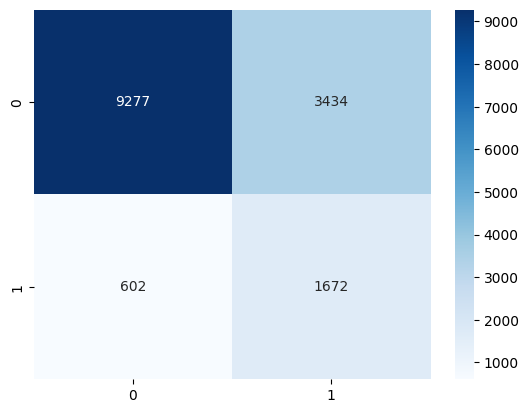

In [87]:
sns.heatmap(confusion_matrix(y_test,y_hat),fmt='d',annot=True,cmap='Blues',color='k')

In [89]:
from xgboost import XGBClassifier


In [ ]:
# XGB = XGBClassifier()
# parametrs = {
#             'min_child_weight': [1, 5, 10],
#             'gamma': [1, 2, 5],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0],
#             'max_depth': range (2, 10, 1),
#             'n_estimators': range(60, 220, 40),
#             'learning_rate': [0.1, 0.01, 0.05],
#             'tree_method': ['gpu_hist'], 
#             'gpu_id': [0]
#             }


# grid = GridSearchCV(XGB, parametrs, n_jobs=-1, scoring='roc_auc', verbose=1)
# grid.fit(X_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)